# Group analysis of EEG data

written by Carina Forster

forster@cbs.mpg.de

last updated 26.06.2024

In [10]:
import mne
mne.set_log_level('error')  # reduce extraneous MNE output
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob

#### We are using data provided by [the neural data science in Python book](https://neuraldatascience.io/7-eeg/erp_group_viz.html)

In [9]:
# where did you store the group data?
data_path = Path("C:/", "Users", "Carina", "Desktop", "MNE_liverpool_2024", "data", "group_data")

In [13]:
# use glob package to get all files in directory
all_files = list(data_path.glob("*"))  # This will get all files and directories

# Print the list of files
for file in all_files:
    print(file)

C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p01-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p02-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p03-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p04-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p05-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p06-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p07-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p08-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p09-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p10-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\sentence_n400_p11-ave.fif
C:\Users\Carina\Desktop\MNE_liverpool_2024\data\group_data\senten

What does the  -ave file contain?

Experimental paradigm and hypothesis: People read sentences that ended in either a semantically congruent word (e.g., I take my coffee with milk and sugar), or an incongruent word (e.g., I take my coffee with milk and glass.). 
We predict an N400 effect, with more negative ERPs for incongruent words than congruent words: significantly greater negativity, between 400–600 ms, largest over midline central-posterior channels (Cz, CPz, Pz), for incongruent words than congruent words.

In [16]:
# define conditions
conditions = ['Control', 'Violation']

# loop over conditions and read in the data, save it in a dictionary w
evokeds = {}

for idx, c in enumerate(conditions):
    evokeds[c] = [mne.read_evokeds(d)[idx].set_montage('easycap-M1') for d in all_files]

evokeds

{'Control': [<Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=27), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=38), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=32), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=40), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=29), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=41), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=39), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=37), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
  <Evoked | 'Control' (average, N=34), -0.1

### Let's check if there is a difference between conditions

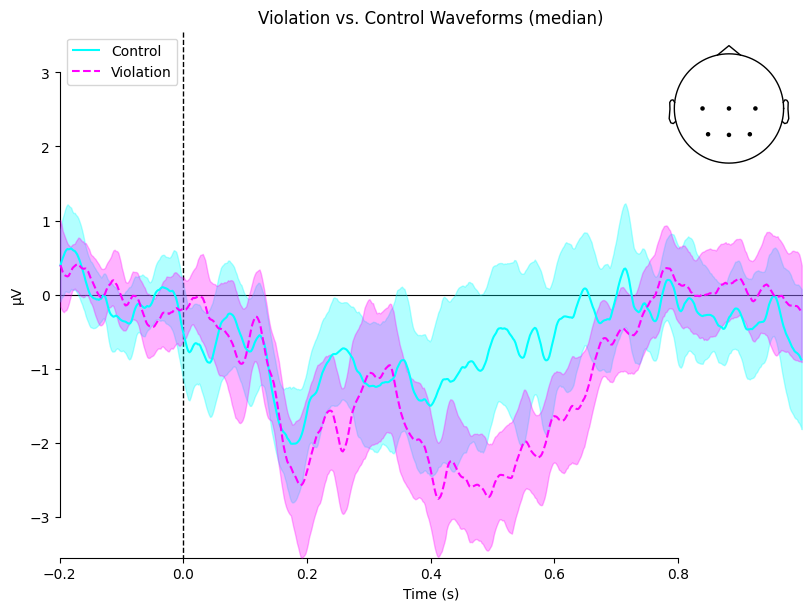

In [19]:
# Define plot parameters
roi = ['C3', 'Cz', 'C4', 
       'P3', 'Pz', 'P4']

# set custom line colors and styles
color_dict = {'Control':'cyan', 'Violation':'magenta'}
linestyle_dict = {'Control':'-', 'Violation':'--'}

mne.viz.plot_compare_evokeds(evokeds,
                             combine='median',
                             legend='upper left',
                             picks=roi, show_sensors='upper right',
                             colors=color_dict,
                             linestyles=linestyle_dict,
                             title='Violation vs. Control Waveforms'
                            )
plt.show()

In [21]:
diff_waves = [mne.combine_evoked([evokeds['Violation'][subj], 
                                  evokeds['Control'][subj]
                                 ],
                                 weights=[1, -1]
                                 ) 
              for subj in range(len(all_files))
              ]
diff_waves

[<Evoked | 'Violation - Control' (average, N=18.246575342465754), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=12.98076923076923), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=18.986842105263158), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=16.716417910447763), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.487179487179485), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=14.5), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.24691358024691), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Con

### Potentially easier to spot the difference: Plot the difference wave

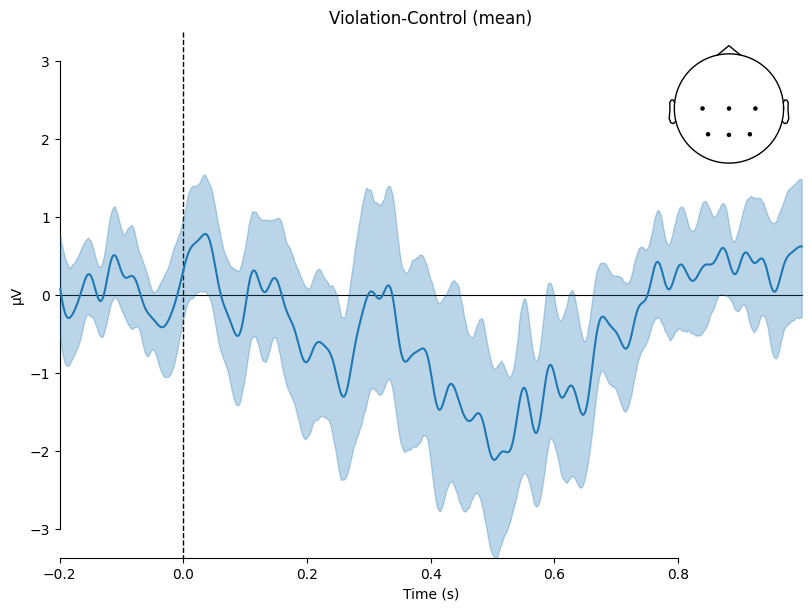

In [22]:
contrast = 'Violation-Control'
mne.viz.plot_compare_evokeds({contrast:diff_waves}, combine='mean',
                            legend=None,
                            picks=roi, show_sensors='upper right',
                            title=contrast
                            )
plt.show()

Is there a statistically significant difference? If yes, where and when?

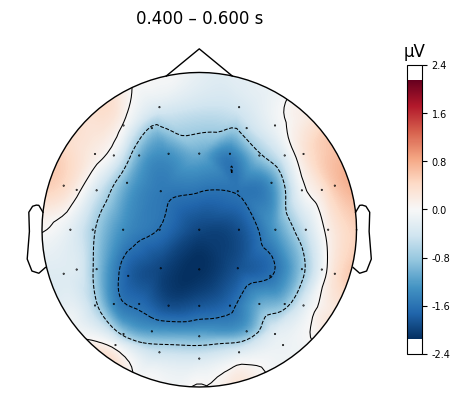

In [23]:
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            size=3
                           )
plt.show()

### What is a grand average?

Make the plot a bit prettier

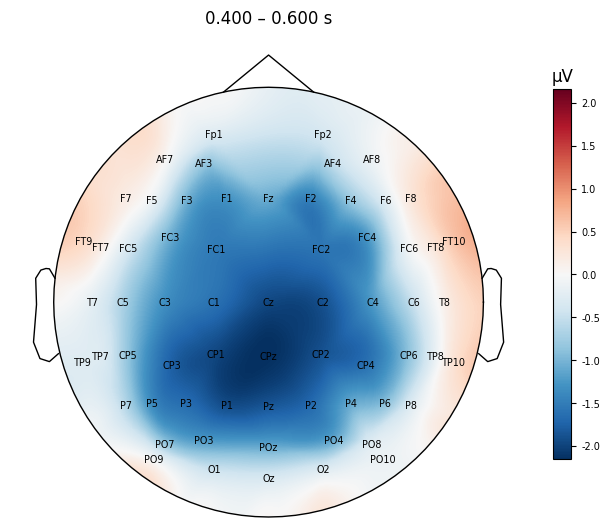

In [24]:
mne.viz.plot_evoked_topomap(mne.grand_average(diff_waves), 
                            times=.500, average=0.200, 
                            show_names=True, sensors=False,
                            contours=False,
                            size=4
                           );

# Everyone's favourite: Statistics 

Recommended reading on [how not to](https://doi.org/10.1111/psyp.12639) do statistics in EEG analysis

There are maaany ways to do statistics on EEG (high dimensional) data. 

## 1. A priori t test (Univariate statistics)

In [25]:
# let's look at the difference waves again 
diff_waves

[<Evoked | 'Violation - Control' (average, N=18.246575342465754), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=12.98076923076923), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=18.986842105263158), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.0), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=16.716417910447763), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=19.487179487179485), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=14.5), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Control' (average, N=20.24691358024691), -0.19922 – 1 s, baseline off, 64 ch, ~402 kB>,
 <Evoked | 'Violation - Con

In [35]:
# How do we get the data from this evoked object?

print(f'the data is of shape: {diff_waves[0].data.shape}')
print(f'the epoch start is: {diff_waves[0].tmin}')
print(f'the epoch end is: {diff_waves[0].tmax}')
print(f'the sampling rate is: {diff_waves[0].info["sfreq"]}')

the data is of shape: (64, 615)
the epoch start is: -0.19921875
the epoch end is: 1.0
the sampling rate is: 512.0


In [47]:
time_win = (.400, .600)
roi = ('Cz', 'CPz', 'Pz')

y = np.array([np.mean(e.get_data(picks=roi, 
                                 tmin=time_win[0], 
                                 tmax=time_win[1]
                                 ),
                      axis=1) 
              for e in diff_waves
              ]
             )

# check shape of result
y.shape

(26, 3)

In [49]:
from scipy import stats 

# average over channels
y_mean = np.mean(y, axis=1)
t, pval = stats.ttest_1samp(y_mean,0)

print('Difference t = ', str(round(t, 2)), 'p = ', str(round(pval, 4)))
# or run a test for each channel

for i, ch in enumerate(roi):
    t, pval = stats.ttest_1samp(y[:,i],0)
    print(f'Channel {ch}: Difference t =  {str(round(t, 2))} p = {str(round(pval, 4))}')

Difference t =  -3.33 p =  0.0027
Channel Cz: Difference t =  -3.23 p = 0.0035
Channel CPz: Difference t =  -3.56 p = 0.0015
Channel Pz: Difference t =  -2.93 p = 0.0071


### What if we don't have a ROI? Just do the same for 62 channel?

## 2. Mass univariate statistics

Suppose we have no a prior hypothesis where and when the effect might happen? 

We can do t tests for each channel and each timepoint:

How many possible combinations? 

Multiple comparisions problem

Which ones do you know? 

We will look at a cluster-based permutation approach
Recommended literature: [Nichols & Holmes, 2001](https://doi.org/10.1002/hbm.1058)

We are now looking  at a very nice graphical approach to cluster permutation testing, created by [Benedikt Ehinger](https://benediktehinger.de/blog/science/statistics-cluster-permutation-test/)

In [50]:
from mne.stats import spatio_temporal_cluster_1samp_test

In [52]:
# Let's prep the data for the cluster permutation test
y = np.swapaxes(np.array([e.get_data() 
                          for e in diff_waves
                          ]
                         ),
                1, 2
                )

# check shape of result
y.shape

(26, 615, 64)

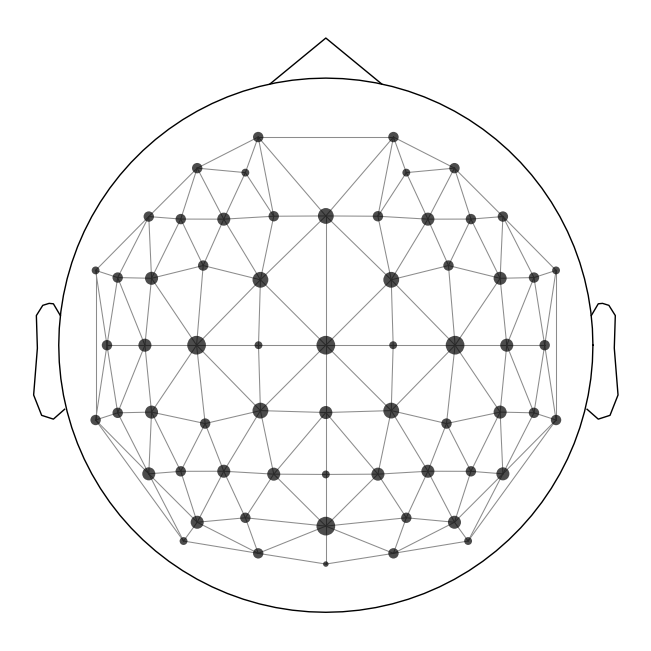

In [55]:
adjacency, ch_names = mne.channels.find_ch_adjacency(diff_waves[0].info, ch_type='eeg')
mne.viz.plot_ch_adjacency(diff_waves[0].info, adjacency, ch_names=ch_names);

In [56]:
n_perm = 10000

t_obs, clusters, cluster_pv, H0 = spatio_temporal_cluster_1samp_test( 
    y, 
    adjacency=adjacency,
    n_permutations=n_perm, 
    out_type='mask',
    n_jobs=-1, 
    verbose='Info'
    )

Using a threshold of 2.059539
stat_fun(H1): min=-5.136169173085791 max=5.136169173085791
Running initial clustering …
Found 58 clusters


  0%|          | Permuting : 0/9999 [00:00<?,       ?it/s]

In [57]:
# find significant points across all clusters
mask_idx = np.where(cluster_pv < 0.05)[0]
mask = [clusters[idx] for idx in mask_idx]

# stats output is time X chan, but ERP data is chan X time, so transpose
mask = mask[0].T

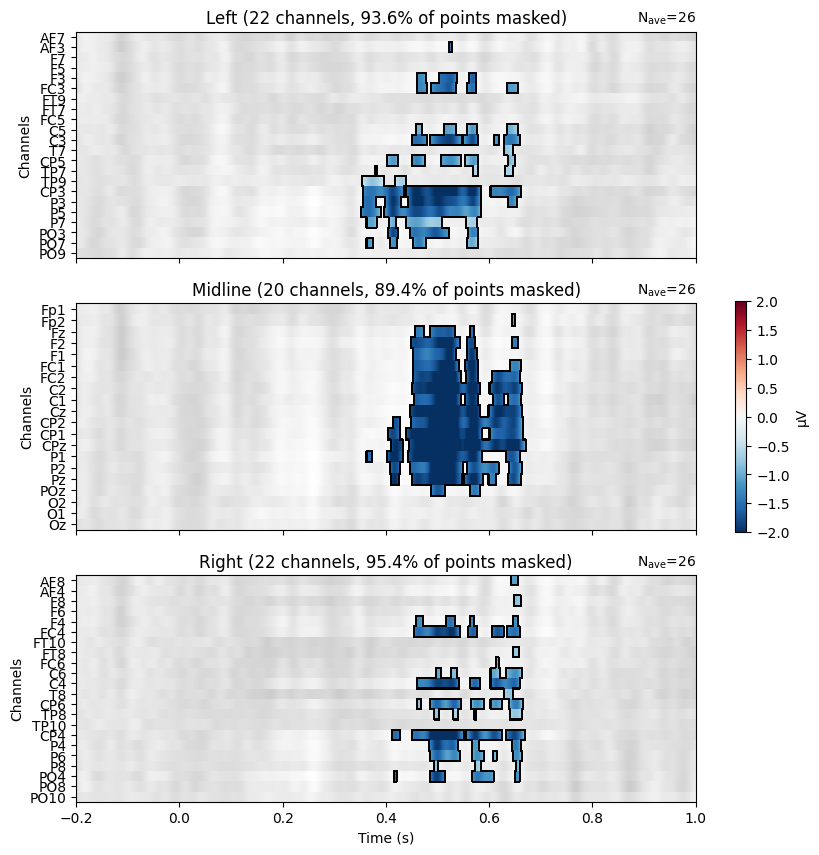

In [58]:

# Create ROIs by checking channel labels
selections = mne.channels.make_1020_channel_selections(diff_waves[0].info, midline="12z")
time_unit = dict(time_unit="s")

fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
mne.grand_average(diff_waves).plot_image(axes=axes,
                            group_by=selections,
                            colorbar=False,
                            show=False,
                            mask=mask,
                            show_names="all",
                            titles=None,
                            **time_unit,
                            clim = dict(eeg=[-2, 2])
                            )
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()

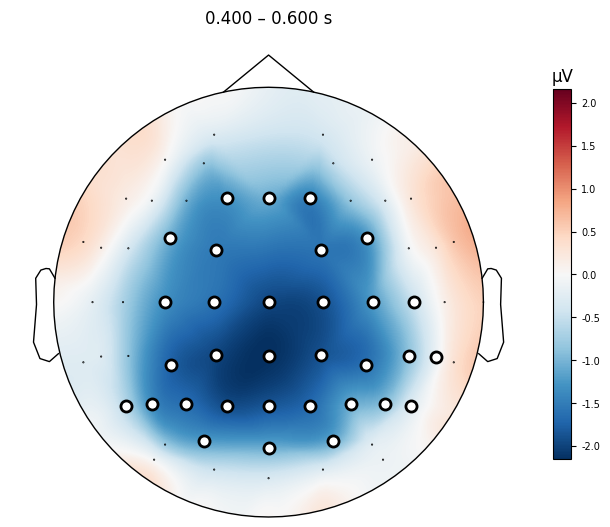

In [59]:
mne.grand_average(diff_waves).plot_topomap(times=.500,
                                             average=0.200,
                                             mask=mask,
                                             contours=False,
                                             sensors=True,
                                             size=4
                                            );

Now let's use Threshold Free Cluster Enhancement (TFCE)

Why?

In [60]:
n_perm = 5000
threshold_tfce = dict(start=0, step=0.2)

t_tfce, clusters_tfce, cluster_pv_tfce, H0_tfce = spatio_temporal_cluster_1samp_test( 
    y, 
    threshold=threshold_tfce,
    adjacency=adjacency,
    n_permutations=n_perm, 
    out_type='mask',
    n_jobs=-1, 
    verbose='Info'
    )

stat_fun(H1): min=-5.136169173085791 max=5.136169173085791
Running initial clustering …
Using 26 thresholds from 0.00 to 5.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 39360 clusters


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

In [ ]:
# stats output is time X chan, but ERP data is chan X time, so transpose
mask = cluster_pv_tfce.reshape(t_tfce.shape).T < .05

fig, axes = plt.subplots(nrows=3, figsize=(10, 10))
axes = {sel: ax for sel, ax in zip(selections, axes.ravel())}
mne.grand_average(diff_waves).plot_image(axes=axes,
                            group_by=selections,
                            colorbar=False,
                            show=False,
                            mask=mask,
                            show_names="all",
                            titles=None,
                            **time_unit,
                            clim = dict(eeg=[-2, 2])
                            )
plt.colorbar(axes["Left"].images[-1], ax=list(axes.values()), shrink=0.3, label="µV")

plt.show()

In [ ]:
mne.grand_average(diff_waves).plot_topomap(times=.500,
                                             average=0.200,
                                             mask=mask,
                                             contours=False,
                                             sensors=True,
                                             size=4
                                            );

Do the results differ? If so, how? 

Important: How NOT to interpret cluster-based permutation tests: [fieldtrip](https://www.fieldtriptoolbox.org/faq/how_not_to_interpret_results_from_a_cluster-based_permutation_test/) and paper by [Sassenhagen](https://doi.org/10.1111/psyp.13335)